In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("C:/Users/HP/Downloads/Documents/SE 544/Data sets/Mall.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
df.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace = True)

In [28]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [30]:
df.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


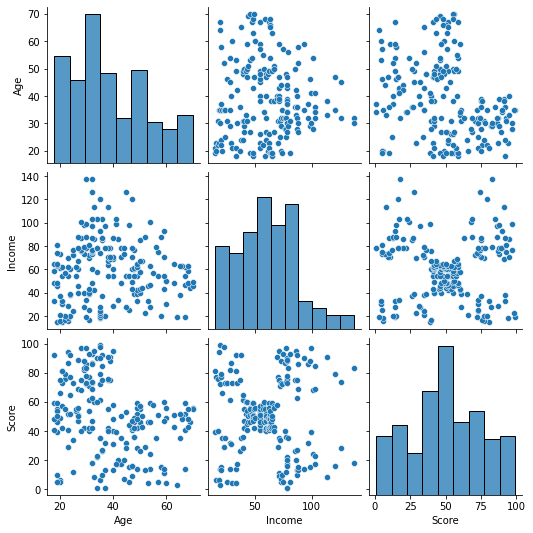

In [31]:
sns.pairplot(df[['Age', 'Income', 'Score']])

## Income VS Score Clusters

In [32]:
    import sklearn.cluster as cluster

In [33]:
kmeans = cluster.KMeans(n_clusters = 5)

In [34]:
kmeans = kmeans.fit(df[['Income', 'Score']])

In [36]:
df['Income_clusters'] = kmeans.labels_

In [37]:
df

,CustomerID,Gender,Age,Income,Score,Income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [38]:
df['Income_clusters'].value_counts()

0    81
1    39
3    35
4    23
2    22
Name: Income_clusters, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Score'>

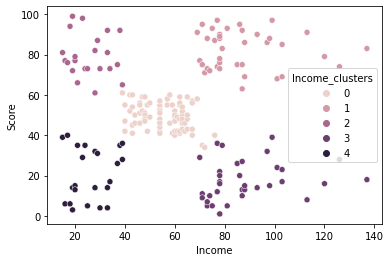

In [39]:
sns.scatterplot(x = 'Income', y = 'Score', hue = 'Income_clusters', data = df)

## Age VS Score Clusters 

In [40]:
kmeans = cluster.KMeans(n_clusters = 2)

In [41]:
kmeans = kmeans.fit(df[['Age', 'Score']])

In [42]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [43]:
df['Age_clusters'] = kmeans.labels_

In [44]:
df

,CustomerID,Gender,Age,Income,Score,Income_clusters,Age_clusters
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,3,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,3,1


In [45]:
df['Age_clusters'].value_counts()

1    115
0     85
Name: Age_clusters, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Score'>

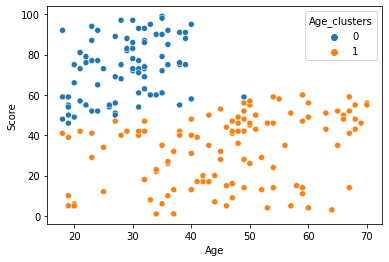

In [46]:
sns.scatterplot(x = 'Age', y = 'Score', hue = 'Age_clusters', data = df)

## Gender VS Score Clusters

In [47]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [48]:
df.Gender = df.Gender.replace(['Male', 'Female'],['0', '1'])

In [49]:
df

,CustomerID,Gender,Age,Income,Score,Income_clusters,Age_clusters
0,1,0,19,15,39,4,1
1,2,0,21,15,81,2,0
2,3,1,20,16,6,4,1
3,4,1,23,16,77,2,0
4,5,1,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,0
196,197,1,45,126,28,3,1
197,198,0,32,126,74,1,0
198,199,0,32,137,18,3,1


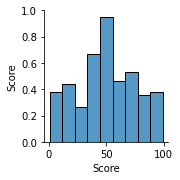

In [53]:
sns.pairplot(df[['Gender', 'Score']])

In [67]:
kmeans = cluster.KMeans(n_clusters = 3)

In [68]:
kmeans = kmeans.fit(df[['Gender', 'Score']])

In [69]:
kmeans.cluster_centers_

array([[ 0.56896552, 82.06896552],
       [ 0.58947368, 48.35789474],
       [ 0.4893617 , 14.59574468]])

In [70]:
df['Gender_clusters'] = kmeans.labels_

In [71]:
df

,CustomerID,Gender,Age,Income,Score,Income_clusters,Age_clusters,Gender_clusters
0,1,0,19,15,39,4,1,1
1,2,0,21,15,81,2,0,0
2,3,1,20,16,6,4,1,2
3,4,1,23,16,77,2,0,0
4,5,1,31,17,40,4,1,1
...,...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,0,0
196,197,1,45,126,28,3,1,2
197,198,0,32,126,74,1,0,0
198,199,0,32,137,18,3,1,2


In [72]:
df['Gender_clusters'].value_counts()

1    95
0    58
2    47
Name: Gender_clusters, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Score'>

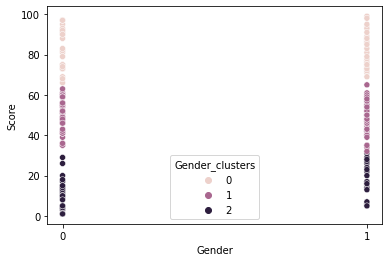

In [73]:
sns.scatterplot(x = 'Gender', y = 'Score', hue = 'Gender_clusters', data = df)

## Elbow Method

### Income VS Score

In [74]:
from sklearn.cluster import KMeans

In [75]:
K_range = range(1,12)

In [76]:
wcss = []

In [77]:
for k in K_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Income', 'Score']])
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [78]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25018.576334776328,
 21850.16528258562,
 19646.482018947245,
 18085.923291243646]

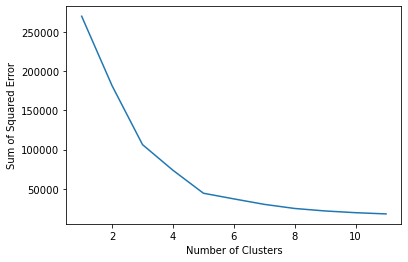

In [79]:
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.plot(K_range, wcss)

### Age VS Score

In [80]:
K_range = range(1,10)

In [81]:
wcss = []

In [82]:
for k in K_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Score']])
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [83]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23810.462233071372,
 19489.64388446867,
 15514.193134351033,
 13055.626865965582,
 11453.288911292724]

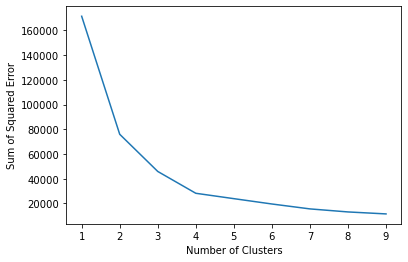

In [84]:
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.plot(K_range, wcss)

### Gender VS Score

In [89]:
K_range = (1, 15)

In [90]:
wcss = []

In [91]:
for k in K_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Gender', 'Score']])
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


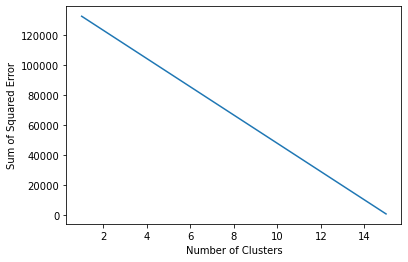

In [92]:
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.plot(K_range, wcss)